# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Sample code to test citipy
city = citipy.nearest_city(22.99, 120.21)
print (city)

city.city_name              # Tainan, is the city name
print (city.city_name)

city.country_code           # this city is in Taiwan

tainan


'tw'

In [ ]:
# # Empty list for holding the latitude and longitude combinations
# lat_lngs = []

# # Empty list for holding the cities names
# cities = []

# # Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)

# # Create a set of random lat and lng combinations
# lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
# lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lat_lngs = zip(lats, lngs)

# # Identify nearest city for each lat, lng combination
# for lat_lng in lat_lngs:
#     city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#     # If the city is unique, then add it to a our cities list
#     if city not in cities:
#         cities.append(city)

# # Print the city count to confirm sufficient count
# print(f"Number of cities in the list: {len(cities)}")

# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# # Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="


# # Define an empty list to fetch the weather data for each city
# city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
# record_count = 1
# set_count = 1

# # Loop through all the cities in our list to fetch weather data
# # for i, city in enumerate(cities[0:55]):                           ################ us this one for testing - it limits the number of api calls. 
# for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 0

#     # Create endpoint URL with each city
#     city_url= query_url + city
    
#     # Log the url, record, and set numbers
#     print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
#     record_count += 1

#     # Run an API request for each of the cities
#     try:
#         # Parse the JSON and retrieve data
#         # city_weather = # YOUR CODE HERE
#         city_weather = requests.get(city_url).json()

#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#         city_lat = city_weather['coord']['lat']
#         city_lng = city_weather['coord']['lon']
#         city_max_temp = city_weather['main']['temp_max']
#         city_humidity = city_weather['main']['humidity']
#         city_clouds = city_weather['clouds']['all']
#         city_wind_speed = city_weather['wind']['speed']
#         city_wind_direction = city_weather['wind']['deg']
#         city_country = city_weather['sys']['country']
#         city_date = city_weather['dt']

#         # city_lat = # YOUR CODE HERE
#         # city_lng = # YOUR CODE HERE
#         # city_max_temp = # YOUR CODE HERE
#         # city_humidity = # YOUR CODE HERE
#         # city_clouds = # YOUR CODE HERE
#         # city_wind = # YOUR CODE HERE
#         # city_country = # YOUR CODE HERE
#         # city_date = # YOUR CODE HERE

#         # Append the City information into city_data list
#         city_data.append({"City": city, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind_speed,
#                           "Country": city_country,
#                           "Date": city_date})

#     # If an error is experienced, skip the city
#     except:
#         print("City not found. Skipping...")
#         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [ ]:
# Export the City_Data into a csv
#city_data_df.to_csv("output/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
#city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
#city_data_df.head()

# Working from now on using the saved csv file to avoid repeated API calls 

In [6]:
# Read saved data
city_data = pd.read_csv("output/cities.csv", index_col="City_ID")


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 554
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        555 non-null    object 
 1   Lat         555 non-null    float64
 2   Lng         555 non-null    float64
 3   Max Temp    555 non-null    float64
 4   Humidity    555 non-null    int64  
 5   Cloudiness  555 non-null    int64  
 6   Wind Speed  555 non-null    float64
 7   Country     551 non-null    object 
 8   Date        555 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.4+ KB


In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,12.71,90,23,1.79,ZA,1667264247
1,barrow,71.2906,-156.7887,-21.99,84,0,5.14,US,1667263729
2,kodiak,57.7900,-152.4072,0.44,46,2,13.69,US,1667264248
3,faya,18.3851,42.4509,13.06,61,5,1.10,SA,1667264248
4,ushuaia,-54.8000,-68.3000,4.81,87,75,9.77,AR,1667263732


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

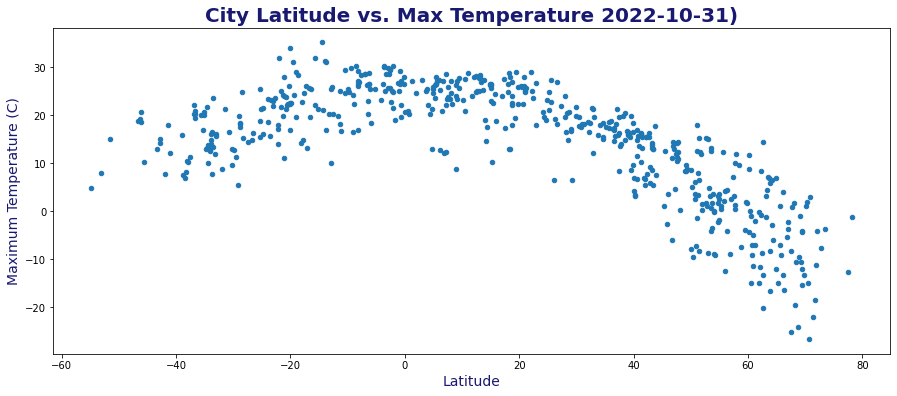

In [17]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter( x='Lat', y='Max Temp', figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 14, color = 'midnightblue' )
plt.ylabel('Maximum Temperature (C)', fontsize = 14, color = 'midnightblue')
plt.title('City Latitude vs. Max Temperature 2022-10-31)', 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");


save_fig = os.path.join('.','output', 'Fig1_Lat_vs_Temp.jpg')             # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                                # Save the figure


# Show plot
plt.show()

#### Latitude Vs. Humidity

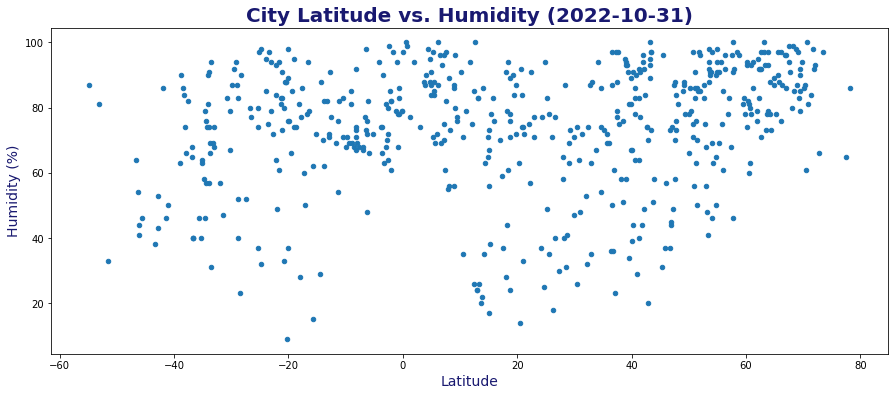

In [18]:
# Build the scatter plots for latitude vs. humidity

city_data_df.plot.scatter( x='Lat', y='Humidity', figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 14, color = 'midnightblue' )
plt.ylabel('Humidity (%)', fontsize = 14, color = 'midnightblue')
plt.title('City Latitude vs. Humidity (2022-10-31)', 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");


save_fig = os.path.join('.','output', 'Fig2_Lat_vs_Humidity.jpg')             # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                                    # Save the figure

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [15]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

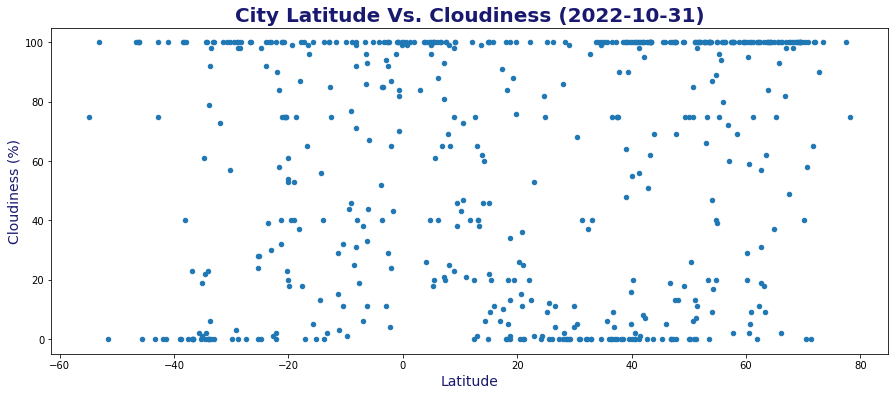

In [19]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter( x='Lat', y='Cloudiness', figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 14, color = 'midnightblue' )
plt.ylabel('Cloudiness (%)', fontsize = 14, color = 'midnightblue')
plt.title('City Latitude Vs. Cloudiness (2022-10-31)', 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");


save_fig = os.path.join('.','output', 'Fig3_Lat_vs_Cloudiness.jpg')             # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                                      # Save the figure

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

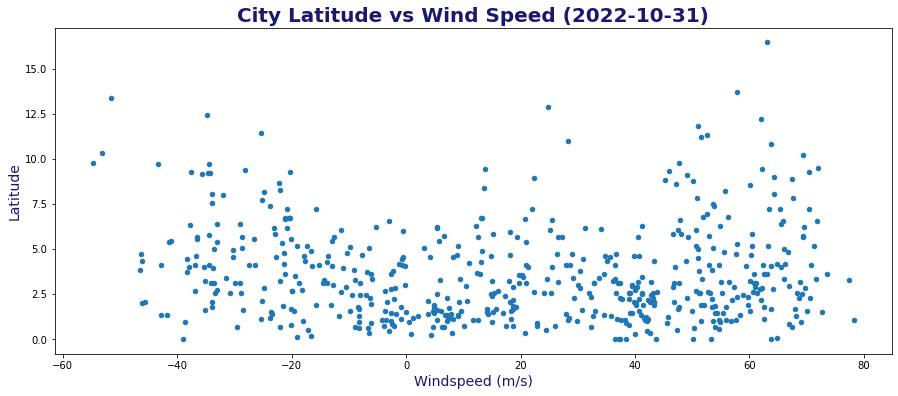

In [24]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

title='City Latitude vs Wind Speed (2022-10-31)'
ylabel = 'Windspeed (m/s)'
xlabel = 'Latitude'
ycol = 'Wind Speed'
xcol = 'Lat'
numfig = 4
filename = f'Fig{numfig}_{xlabel}_vs_Windspeed.jpg'

# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter( x=xcol, y=ycol, figsize=(15, 6))

# Incorporate the other graph properties
plt.xlabel(ylabel, fontsize = 14, color = 'midnightblue' )
plt.ylabel(xlabel, fontsize = 14, color = 'midnightblue')
plt.title(title, 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");


save_fig = os.path.join('.','output', filename)             # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                  # Save the figure

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
df = city_data_df
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,12.71,90,23,1.79,ZA,1667264247
1,barrow,71.2906,-156.7887,-21.99,84,0,5.14,US,1667263729
2,kodiak,57.7900,-152.4072,0.44,46,2,13.69,US,1667264248
3,faya,18.3851,42.4509,13.06,61,5,1.10,SA,1667264248
4,ushuaia,-54.8000,-68.3000,4.81,87,75,9.77,AR,1667263732


In [67]:
df = city_data_df
ylabel = 'Windspeed (m/s)'
xlabel = 'Latitude'
ycol = 'Wind Speed'
ydata = df[ycol]
xcol = 'Lat'
xdata = df[xcol]
xdata
xmin = xdata.min()
xmax = xdata.max()
linX = xdata.min() + (xdata.max() - xdata.min())/500
linY = ydata.min() + (ydata.max() - ydata.min())/500
print (xmin, xmax, linX , linY)

-54.8 78.2186 -54.5339628 0.0329


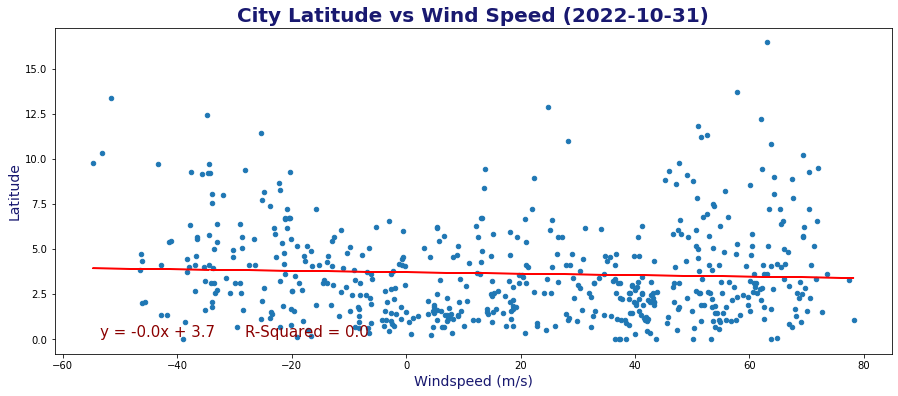

In [72]:
#set my variables
df = city_data_df
title='City Latitude vs Wind Speed (2022-10-31)'
ylabel = 'Windspeed (m/s)'
xlabel = 'Latitude'
ycol = 'Wind Speed'
ydata = df[ycol]
xcol = 'Lat'
xdata = df[xcol]
numfig = 5
filename = f'Fig{numfig}_{xlabel}_vs_Windspeed.jpg'


# linear Regression equation calculation
(slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
regress_values = xdata * slope + intercept

# create a string annoation that for the equation of the line and r**2
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_square_str = f'R-Squared = {round(rvalue**2,2)}'

# locate the annoation of the linear regression line and R^2 
linX = xdata.min() + (xdata.max() - xdata.min())*0.01       # locate the linear regression equation annotation 1% to the right of the smallest x value
linY = ydata.min() + (ydata.max() - ydata.min())*0.01       # locate the linear regression equation and r^2 annoation 1% above of the lowest value
r2x = xdata.min() + (xdata.max() - xdata.min())*0.2         # locate the r^2 value 20% to the right of the smallest x value

# Build the scatter plots for latitude vs. cloudiness
df.plot.scatter( x=xcol, y=ycol, figsize=(15, 6))
plt.plot(xdata,regress_values,'red')

# Incorporate the other graph properties
plt.xlabel(ylabel, fontsize = 14, color = 'midnightblue' )
plt.ylabel(xlabel, fontsize = 14, color = 'midnightblue')
plt.title(title, 
           fontsize = 20, 
           color = 'midnightblue', 
           fontweight="bold");
plt.annotate(line_eq,(linX,linY),fontsize=15,color="darkred");                  # This code plots the equation of the line at location (22, 36) on the figure
plt.annotate(r_square_str,(r2x,linY),fontsize=15,color="darkred");             # Add the r-squared value to the regression

save_fig = os.path.join('.','output', filename)             # Prepare to save the figure  
plt.savefig(save_fig, bbox_inches='tight')                  # Save the figure



In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,barrow,71.2906,-156.7887,-21.99,84,0,5.14,US,1667263729
2,kodiak,57.7900,-152.4072,0.44,46,2,13.69,US,1667264248
3,faya,18.3851,42.4509,13.06,61,5,1.10,SA,1667264248
5,norman wells,65.2820,-126.8329,-14.98,78,75,7.20,CA,1667264248
11,kapaa,22.0752,-159.3190,28.99,75,20,7.20,US,1667263723


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,12.71,90,23,1.79,ZA,1667264247
4,ushuaia,-54.8000,-68.3000,4.81,87,75,9.77,AR,1667263732
6,atuona,-9.8000,-139.0333,24.93,71,1,5.13,PF,1667264249
7,constitucion,-35.3333,-72.4167,17.01,40,0,3.98,CL,1667264249
8,busselton,-33.6500,115.3333,16.50,66,92,3.11,AU,1667263725


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE